# Graded Lab Assignment: Logistic Regression (10 points)

Marik Westerhof
    

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The numbers shown are: 
 [[0 1 2 3 4]
 [5 6 7 8 9]]


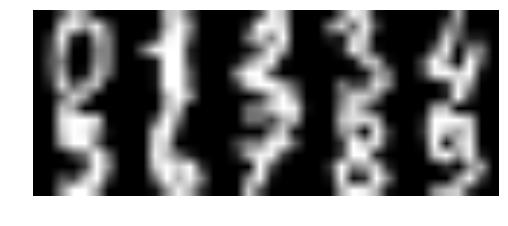

In [6]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print("The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10])))

In [7]:
#Make a prediction function h
def prediction_function(x, theta):
    # X is already transposed in the Training progress function
    z= dot(theta.T,x)
    # The prediction function is using logistic regression, so 1/(1+e^(theta*x)
    x_predict = 1 / (1 + exp(-z))
    return x_predict

In [8]:
#Cost function:
def cost_function(x_predict, y):
    # Count how big x is
    m = x.shape[0]
    # Cost function by dot matrix multiplication
    # The prediction function is using logistic regression
    J = (dot(y, log(x_predict)) + dot((1 - y), log(1 - x_predict))) / (-m)
    return J

In [9]:
# Gradient descent function
def compute_gradient(x_predict, y, x):
    # Once more, count how big x is
    m= x.shape[0]
    # Once more, use dot  matrix multiplication divided by m
    gradient = dot(x.T, (x_predict - y)) / m
    return gradient

**(1) Preventing overfitting**

To prevent overfitting, several things can be done:

* Use a large amount of data

* Keep the model as simple as possible

* Average a model out with ensembling

The first two of these points were used for this Assignment: the learning algorithm is fairly simple, and a large amount of data is used in the first place, namely 1500.

**(2) Choosing a learning rate Alpha**

Interestingly, the learning rate (alpha) had to be very small in order to not cause overfitting. The ideal learning rate had to be as large as possible, though, to prevent underfitting.

Starting at 0.1, and then dividing by 10 every attempt, eventually lead to 0.001 no longer causing any problems. Then, increasingly small increments were added (from 0.001 to 0.0001 and 0.00001) to finally reach the learning rate of 0.00272. One could continue to do this for as many decimals as desired, but I believe this should be enough for this Assignment.

**(3) Plotting**

The plotting is done in the code below and shows the amount of faulty results over every iteration. This algorithm had a roughly 72% correct guessing rate. Yay!

[ 0.94209582  0.52425184  0.44800398  0.39615765  0.366307    0.34620895
  0.33551527  0.33093853  0.32785002  0.32270179  0.31897436  0.31527295
  0.31075109  0.30597861  0.30105854  0.29589103  0.29130726  0.28757336
  0.28510901  0.28409468  0.2829623   0.28161251  0.27997958  0.27863881
  0.27773734]


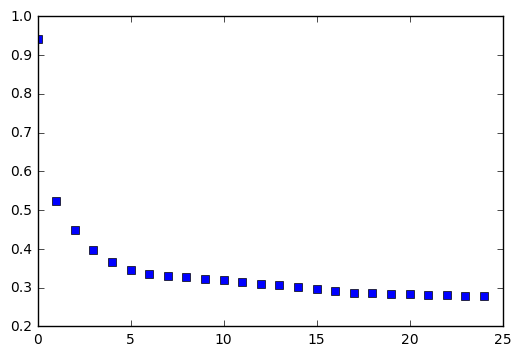

In [46]:
# Variables with suitable learning rate (see end of NOTEBOOK for approach)
alpha = 0.00272
iterations = 25
theta = zeros((64,10))

# Overfitting check
x = reshape(digits.images[:1500],(1500, 64))
x_test = reshape(digits.images[1500:],(297, 64))

target = digits.target[:1500]
target_test = digits.target[1500:]

# Training loop
m = x.shape[0]
cost = zeros(iterations)

#Stop condition: the amount of iterations
for i in range(iterations):
    # Start with a temp cost of 0
    temp_cost = 0
    for j in range(m):
        # Referring to hypothesis function
        xj = reshape(x[j,:],(1,len(x[j,:])))
        x_predict = prediction_function(xj.T, theta)
        
        # Initiating y; Andrew Ng's example code
        y = zeros(10)
        y[target[j]] = 1
        
        # Referring to cost function
        temp_cost += cost_function(x_predict, y)
        
        # Referring to gradient descent function
        gradient = compute_gradient(x_predict.T, reshape(y, (1, 10)), xj)
        # Updating theta
        theta = theta - alpha * gradient
        
    # Update temp cost
    cost[i] = temp_cost
    
#Print and plot the progress of the cost
print(cost)
plot(list(range(iterations)), cost, 'bs')

The plot shows how the amount of faulty estimates by the machine reduces at every iteration, especially early on. For every run, it will continue to be more accurate, however, after 25 runs, the accuracy was already at 72.22%.

**(4) Conclusion**
In conclusion, this model uses logistic regression to learn from a large dataset to distinguish numbers in an 8x8 image. All basic functions (hypothesis, cost, and gradient descent) were vectorized to use the multivariate data set. After 25 iterations and picking a learning rate of 0.00272, the accuracy of the algorithm got up to 72%. Not bad!


**(5) Code**
The code contains as many comments as I could deem necessary.